In [65]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the two DNB images
with rasterio.open('ndvi_2022.tif') as src1:
    dnb1 = src1.read(1)

with rasterio.open('ndvi.tif') as src2:
    dnb2 = src2.read(1)



In [66]:
# Normalize input images
dnb1 = (dnb1-np.amin(dnb1)) / (np.amax(dnb1)-np.amin(dnb1))
dnb2 = (dnb2-np.amin(dnb2)) / (np.amax(dnb2)-np.amin(dnb2))


# Calculate the block-based weighted distance difference
window_size = 2
histogram_bins = 32
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd



In [16]:
# Calculate the threshold based on the block-based weighted distance difference
threshold = np.mean(block_diff) + 2 * np.std(block_diff)


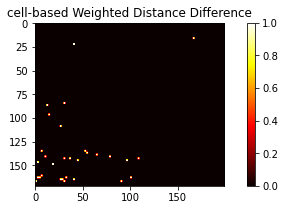

In [18]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(8, 3))
plt.imshow(block_diff>threshold, cmap='hot')
plt.title('cell-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [67]:

from skimage.filters import threshold_triangle

threshold = threshold_triangle(block_diff)


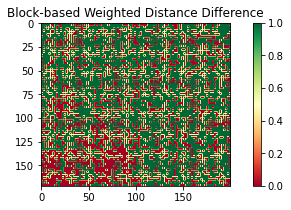

In [68]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(8, 3))
plt.imshow(block_diff>threshold, cmap='RdYlGn')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [21]:
from skimage.filters import threshold_local

# Ensure block_size is odd
if window_size % 2 == 0:
    window_size += 1

# Calculate the threshold using Adaptive Thresholding
block_diff_threshold = threshold_local(block_diff, window_size, method='gaussian', mode='reflect')


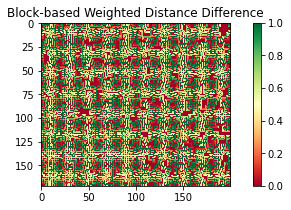

In [23]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(8,3))
plt.imshow(block_diff>block_diff_threshold, cmap='RdYlGn')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [69]:
from skimage.filters import threshold_otsu

block_diff_threshold = threshold_otsu(block_diff)


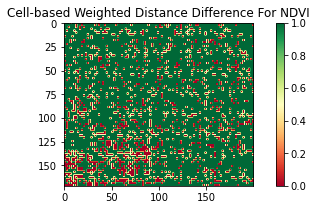

In [70]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(8, 3))
plt.imshow(block_diff>block_diff_threshold, cmap='RdYlGn')
plt.title('Cell-based Weighted Distance Difference For NDVI')
plt.colorbar()
plt.show()


In [71]:
# Calculate the block-based weighted distance difference
window_size = 25
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd



In [72]:
from skimage.filters import threshold_otsu

block_diff_threshold = threshold_otsu(block_diff)


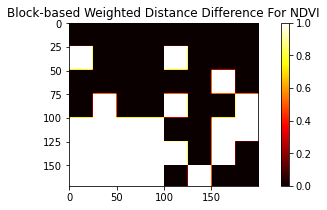

In [73]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(8, 3))
plt.imshow(block_diff>block_diff_threshold, cmap='hot')
plt.title('Block-based Weighted Distance Difference For NDVI')
plt.colorbar()
plt.show()


In [25]:
block_diff_threshold

56.45591582944592

In [18]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the two DNB images
with rasterio.open('ndwi_2022.tif') as src1:
    dnb1 = src1.read(1)

with rasterio.open('ndwi.tif') as src2:
    dnb2 = src2.read(1)



C:\Users\Abhisek\AppData\Roaming\Python\Python39\site-packages\rasterio\__init__.py:332: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [26]:
# Calculate the block-based weighted distance difference
window_size = 25
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd



In [27]:
from skimage.filters import threshold_otsu

block_diff_threshold = threshold_otsu(block_diff)


In [28]:
print(block_diff_threshold)

12


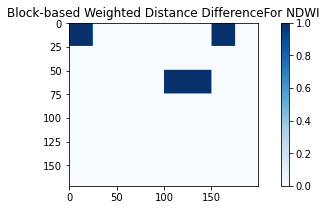

In [30]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(8, 3))
plt.imshow(block_diff>block_diff_threshold+10, cmap='Blues')
plt.title('Block-based Weighted Distance DifferenceFor NDWI')
plt.colorbar()
plt.show()


In [42]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the two DNB images
with rasterio.open('ndwi_2022.tif') as src1:
    dnb1 = src1.read(1)

with rasterio.open('ndwi.tif') as src2:
    dnb2 = src2.read(1)



In [78]:
# Calculate the block-based weighted distance difference
window_size = 2
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd



In [79]:
from skimage.filters import threshold_otsu

block_diff_threshold = threshold_otsu(block_diff)


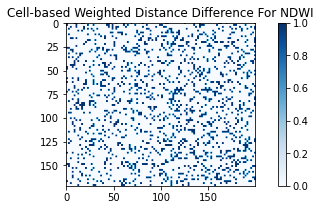

In [80]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(8, 3))
plt.imshow(block_diff>block_diff_threshold, cmap='Blues')
plt.title('Cell-based Weighted Distance Difference For NDWI')
plt.colorbar()
plt.show()


In [81]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the two DNB images
with rasterio.open('ndbi_2022.tif') as src1:
    dnb1 = src1.read(1)

with rasterio.open('ndbi.tif') as src2:
    dnb2 = src2.read(1)



In [82]:
# Calculate the block-based weighted distance difference
window_size = 2
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd



In [83]:
from skimage.filters import threshold_otsu

block_diff_threshold = threshold_otsu(block_diff)


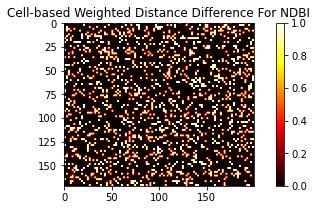

In [84]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(8, 3))
plt.imshow(block_diff>block_diff_threshold, cmap='hot')
plt.title('Cell-based Weighted Distance Difference For NDBI')
plt.colorbar()
plt.show()


In [85]:
# Calculate the block-based weighted distance difference
window_size = 25
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd



In [86]:
from skimage.filters import threshold_otsu

block_diff_threshold = threshold_otsu(block_diff)


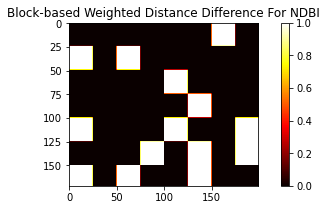

In [88]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(8, 3))
plt.imshow(block_diff>block_diff_threshold, cmap='hot')
plt.title('Block-based Weighted Distance Difference For NDBI')
plt.colorbar()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


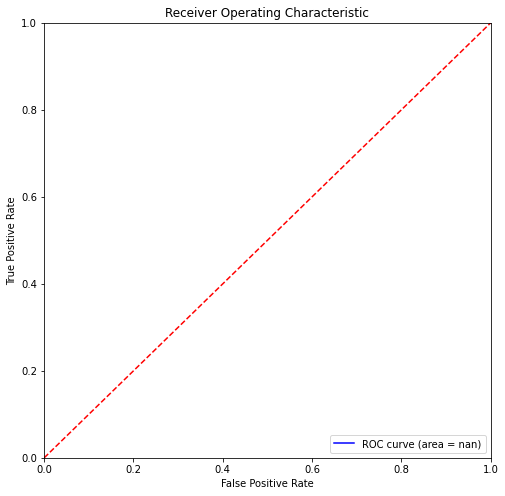

Optimal Threshold: 11


In [58]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Calculate the block-based weighted distance difference
window_size = 10
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd

# Create ground truth labels indicating change (1) or no change (0)
ground_truth = np.zeros_like(block_diff)
# Populate ground truth labels based on your dataset

# Flatten the block_diff and ground_truth arrays
block_diff_flat = block_diff.flatten()
ground_truth_flat = ground_truth.flatten()

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(ground_truth_flat, block_diff_flat)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Find the optimal threshold based on the ROC curve
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

print('Optimal Threshold:', optimal_threshold)


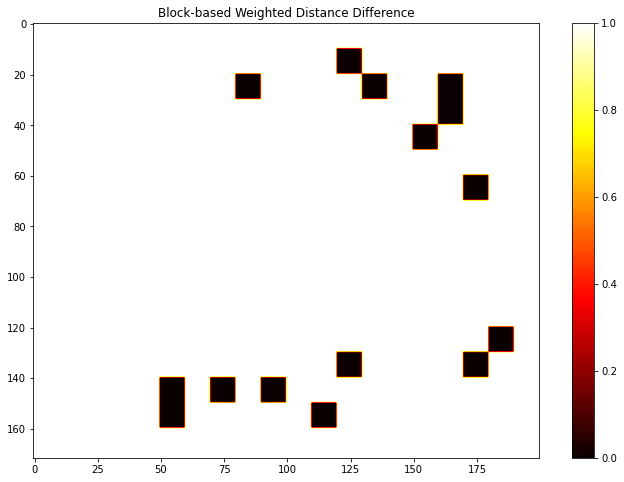

In [59]:
# Plot the block-based weighted distance difference
plt.figure(figsize=(12, 8))
plt.imshow(block_diff>1, cmap='hot')
plt.title('Block-based Weighted Distance Difference')
plt.colorbar()
plt.show()


In [37]:
import numpy as np
import pandas as pd
import rasterio

# Load the two TIFF images
tif1_path = 'ndbi_2022.tif'
tif2_path = 'ndbi.tif'

with rasterio.open(tif1_path) as tif1:
    dnb1 = tif1.read(1)

with rasterio.open(tif2_path) as tif2:
    dnb2 = tif2.read(1)

# Block-based method
window_size = 25
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd

# Cell-based method
window_size = 2
histogram_bins = 8
cell_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        cell1 = dnb1[i:i+window_size, j:j+window_size]
        cell2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(cell1, bins=histogram_bins)
        hist2, _ = np.histogram(cell2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        cell_diff[i:i+window_size, j:j+window_size] = wdd

# Store the block-based and cell-based data in separate CSV files
block_df = pd.DataFrame({'Block-Based Difference': block_diff.flatten()})
block_df.to_csv('block_output_ndbi.csv', index=False)

cell_df = pd.DataFrame({'Cell-Based Difference': cell_diff.flatten()})
cell_df.to_csv('cell_output_ndbi.csv', index=False)


C:\Users\Abhisek\AppData\Roaming\Python\Python39\site-packages\rasterio\__init__.py:332: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [38]:
import numpy as np
import pandas as pd
import rasterio

# Load the two TIFF images
tif1_path = 'ndvi_2022.tif'
tif2_path = 'ndvi.tif'

with rasterio.open(tif1_path) as tif1:
    dnb1 = tif1.read(1)

with rasterio.open(tif2_path) as tif2:
    dnb2 = tif2.read(1)

# Block-based method
window_size = 25
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd

# Cell-based method
window_size = 2
histogram_bins = 8
cell_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        cell1 = dnb1[i:i+window_size, j:j+window_size]
        cell2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(cell1, bins=histogram_bins)
        hist2, _ = np.histogram(cell2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        cell_diff[i:i+window_size, j:j+window_size] = wdd

# Store the block-based and cell-based data in separate CSV files
block_df = pd.DataFrame({'Block-Based Difference': block_diff.flatten()})
block_df.to_csv('block_output_ndvi.csv', index=False)

cell_df = pd.DataFrame({'Cell-Based Difference': cell_diff.flatten()})
cell_df.to_csv('cell_output_ndvi.csv', index=False)


In [39]:
import numpy as np
import pandas as pd
import rasterio

# Load the two TIFF images
tif1_path = 'ndwi_2022.tif'
tif2_path = 'ndwi.tif'

with rasterio.open(tif1_path) as tif1:
    dnb1 = tif1.read(1)

with rasterio.open(tif2_path) as tif2:
    dnb2 = tif2.read(1)

# Block-based method
window_size = 25
histogram_bins = 8
block_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        block1 = dnb1[i:i+window_size, j:j+window_size]
        block2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(block1, bins=histogram_bins)
        hist2, _ = np.histogram(block2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        block_diff[i:i+window_size, j:j+window_size] = wdd

# Cell-based method
window_size = 2
histogram_bins = 8
cell_diff = np.zeros_like(dnb1)
rows, cols = dnb1.shape

for i in range(0, rows, window_size):
    for j in range(0, cols, window_size):
        cell1 = dnb1[i:i+window_size, j:j+window_size]
        cell2 = dnb2[i:i+window_size, j:j+window_size]
        hist1, _ = np.histogram(cell1, bins=histogram_bins)
        hist2, _ = np.histogram(cell2, bins=histogram_bins)
        wdd = np.sqrt(np.sum(np.square(np.sqrt(hist1) - np.sqrt(hist2))))
        cell_diff[i:i+window_size, j:j+window_size] = wdd

# Store the block-based and cell-based data in separate CSV files
block_df = pd.DataFrame({'Block-Based Difference': block_diff.flatten()})
block_df.to_csv('block_output_ndwi.csv', index=False)

cell_df = pd.DataFrame({'Cell-Based Difference': cell_diff.flatten()})
cell_df.to_csv('cell_output_ndwi.csv', index=False)


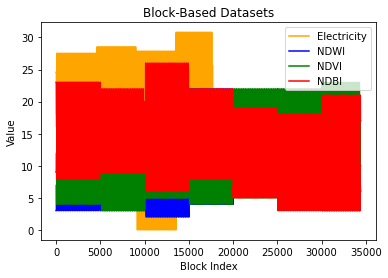

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV files
ndbi_data = pd.read_csv('block_output_ndbi.csv')['Block-Based Difference']
ndvi_data = pd.read_csv('block_output_ndvi.csv')['Block-Based Difference']
ndwi_data = pd.read_csv('block_output_ndwi.csv')['Block-Based Difference']
electricity_data = pd.read_csv('block_output.csv')['Block-Based Difference']
ndwi_data = ndwi_data[ndwi_data > 1]
ndvi_data = ndvi_data[ndvi_data > 0]
ndbi_data = ndbi_data[ndbi_data > 0]
electricity_data = electricity_data[electricity_data >-11]


# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the datasets with different colors
ax.plot(electricity_data, color='orange', label='Electricity')
ax.plot(ndbi_data, color='blue', label='NDWI')
ax.plot(ndvi_data, color='green', label='NDVI')
ax.plot(ndwi_data, color='red', label='NDBI')


# Set labels and title
ax.set_xlabel('Block Index')
ax.set_ylabel('Value')
ax.set_title('Block-Based Datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [10]:
ndbi_data = pd.read_csv('cell_output_ndbi.csv')
print(ndbi_data.head())


   Cell-Based Difference
0                      1
1                      1
2                      1
3                      1
4                      2


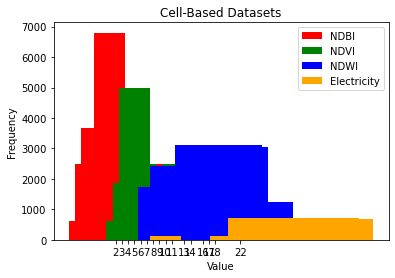

In [51]:
import matplotlib.pyplot as plt
import pandas as pd


# Calculate the frequency of each value
ndbi_freq = ndbi_data.value_counts().sort_index()
ndvi_freq = ndvi_data.value_counts().sort_index()
ndwi_freq = ndwi_data.value_counts().sort_index()
electricity_freq = electricity_data.value_counts().sort_index()

# Set the bar width
bar_width = 5

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the frequency bars for each dataset
ax.bar(ndbi_freq.index - bar_width, ndbi_freq.values, width=bar_width, color='red', label='NDBI')
ax.bar(ndvi_freq.index, ndvi_freq.values, width=bar_width, color='green', label='NDVI')
ax.bar(ndwi_freq.index + bar_width, ndwi_freq.values, width=bar_width, color='blue', label='NDWI')
ax.bar(electricity_freq.index + 2 * bar_width, electricity_freq.values, width=bar_width, color='orange', label='Electricity')

# Set labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Cell-Based Datasets')

# Set the x-axis ticks
ax.set_xticks(ndbi_freq.index)

# Add a legend
ax.legend()

# Show the plot
plt.show()


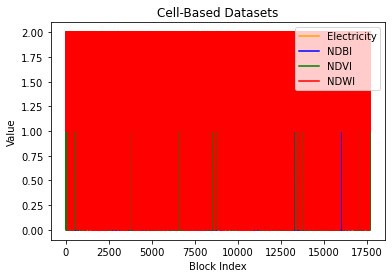

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data from the CSV files
ndbi_data = pd.read_csv('cell_output_ndbi.csv')['Cell-Based Difference']
ndvi_data = pd.read_csv('cell_output_ndvi.csv')['Cell-Based Difference']
ndwi_data = pd.read_csv('cell_output_ndwi.csv')['Cell-Based Difference']
electricity_data = pd.read_csv('cell_output.csv')['Cell-Based Difference']

# Determine the length of the shortest dataset
min_length = min(len(electricity_data), len(ndbi_data), len(ndvi_data), len(ndwi_data))

# Truncate the datasets to the length of the shortest dataset
electricity_data = electricity_data[:min_length]
ndbi_data = ndbi_data[:min_length]
ndvi_data = ndvi_data[:min_length]
ndwi_data = ndwi_data[:min_length]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Set the x-axis range
x = np.arange(min_length)

# Plot the datasets with different colors
ax.plot(x, electricity_data, color='orange', label='Electricity')
ax.plot(x, ndbi_data, color='blue', label='NDBI')
ax.plot(x, ndvi_data, color='green', label='NDVI')
ax.plot(x, ndwi_data, color='red', label='NDWI')

# Set labels and title
ax.set_xlabel('Block Index')
ax.set_ylabel('Value')
ax.set_title('Cell-Based Datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()


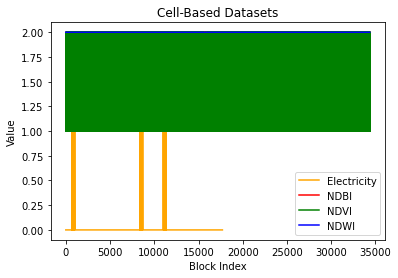

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV files
ndbi_data = pd.read_csv('cell_output_ndbi.csv')['Cell-Based Difference']
ndvi_data = pd.read_csv('cell_output_ndvi.csv')['Cell-Based Difference']
ndwi_data = pd.read_csv('cell_output_ndwi.csv')['Cell-Based Difference']
electricity_data = pd.read_csv('cell_output.csv')['Cell-Based Difference']

ndwi_data = ndwi_data[ndwi_data > 1]
ndvi_data = ndvi_data[ndvi_data > 0]
ndbi_data = ndbi_data[ndbi_data > 0]
electricity_data = electricity_data[electricity_data >-11]



# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the datasets with different colors
ax.plot(electricity_data, color='orange', label='Electricity')
ax.plot(ndbi_data, color='red', label='NDBI')
ax.plot(ndvi_data, color='green', label='NDVI')
ax.plot(ndwi_data, color='blue', label='NDWI')


# Set labels and title
ax.set_xlabel('Block Index')
ax.set_ylabel('Value')
ax.set_title('Cell-Based Datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()


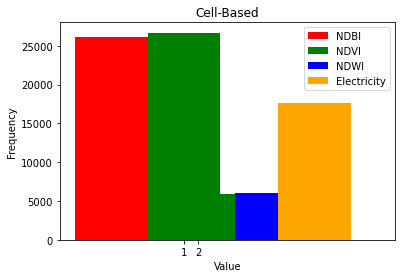

In [2]:
import matplotlib.pyplot as plt
import pandas as pd


# Calculate the frequency of each value
ndbi_freq = ndbi_data.value_counts().sort_index()
ndvi_freq = ndvi_data.value_counts().sort_index()
ndwi_freq = ndwi_data.value_counts().sort_index()
electricity_freq = electricity_data.value_counts().sort_index()

# Set the bar width
bar_width = 5

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the frequency bars for each dataset
ax.bar(ndbi_freq.index - bar_width, ndbi_freq.values, width=bar_width, color='red', label='NDBI')
ax.bar(ndvi_freq.index, ndvi_freq.values, width=bar_width, color='green', label='NDVI')
ax.bar(ndwi_freq.index + bar_width, ndwi_freq.values, width=bar_width, color='blue', label='NDWI')
ax.bar(electricity_freq.index + 2 * bar_width, electricity_freq.values, width=bar_width, color='orange', label='Electricity')

# Set labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Cell-Based')

# Set the x-axis ticks
ax.set_xticks(ndbi_freq.index)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [11]:
ndwi_data.describe()

count    34400.000000
mean         1.115465
std          0.467601
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Cell-Based Difference, dtype: float64

C:\Users\Abhisek\AppData\Local\Temp\ipykernel_4720\2968274187.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


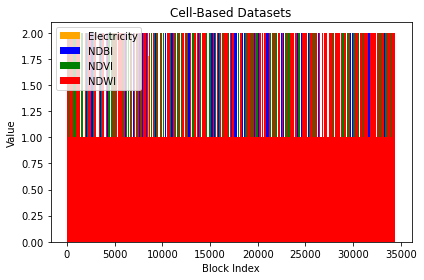

In [24]:
# Get the maximum length of the datasets
max_length = max(len(electricity_data), len(ndbi_data), len(ndvi_data), len(ndwi_data))

# Convert data to floating-point type
electricity_data = electricity_data.astype(float)
ndbi_data = ndbi_data.astype(float)
ndvi_data = ndvi_data.astype(float)
ndwi_data = ndwi_data.astype(float)

# Pad datasets with NaN values to make them equal in length
electricity_data = np.pad(electricity_data, (0, max_length - len(electricity_data)), mode='constant', constant_values=np.nan)
ndbi_data = np.pad(ndbi_data, (0, max_length - len(ndbi_data)), mode='constant', constant_values=np.nan)
ndvi_data = np.pad(ndvi_data, (0, max_length - len(ndvi_data)), mode='constant', constant_values=np.nan)
ndwi_data = np.pad(ndwi_data, (0, max_length - len(ndwi_data)), mode='constant', constant_values=np.nan)

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Set the x-axis range
x = range(max_length)

# Set the bar width
bar_width = 5

# Plot the datasets with different colors
ax.bar(x, electricity_data, width=bar_width, color='orange', label='Electricity')
ax.bar(x, ndbi_data, width=bar_width, color='blue', label='NDBI')
ax.bar(x, ndvi_data, width=bar_width, color='green', label='NDVI')
ax.bar(x, ndwi_data, width=bar_width, color='red', label='NDWI')

# Set labels and title
ax.set_xlabel('Block Index')
ax.set_ylabel('Value')
ax.set_title('Cell-Based Datasets')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Get the maximum length of the datasets
max_length = max(len(electricity_data), len(ndbi_data), len(ndvi_data), len(ndwi_data))

# Convert data to floating-point type
electricity_data = electricity_data.astype(float)
ndbi_data = ndbi_data.astype(float)
ndvi_data = ndvi_data.astype(float)
ndwi_data = ndwi_data.astype(float)

ndwi_data = ndwi_data[ndwi_data > 1]
ndvi_data = ndvi_data[ndvi_data > 1]


# Pad datasets with NaN values to make them equal in length
electricity_data = np.pad(electricity_data, (0, max_length - len(electricity_data)), mode='constant', constant_values=np.nan)
ndbi_data = np.pad(ndbi_data, (0, max_length - len(ndbi_data)), mode='constant', constant_values=np.nan)
ndvi_data = np.pad(ndvi_data, (0, max_length - len(ndvi_data)), mode='constant', constant_values=np.nan)
ndwi_data = np.pad(ndwi_data, (0, max_length - len(ndwi_data)), mode='constant', constant_values=np.nan)

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Set the x-axis range
x = range(max_length)

# Set the bar width
bar_width = 0.2

# Plot the datasets with different colors and positions
ax.bar(x, electricity_data, width=bar_width, color='orange', label='Electricity')
ax.bar([i + bar_width for i in x], ndbi_data, width=bar_width, color='red', label='NDBI')
ax.bar([i + 2 * bar_width for i in x], ndvi_data, width=bar_width, color='green', label='NDVI')
ax.bar([i + 3 * bar_width for i in x], ndwi_data, width=bar_width, color='blue', label='NDWI')

# Set labels and title
ax.set_xlabel('Block Index')
ax.set_ylabel('Value')
ax.set_title('Cell-Based Datasets')

# Set the x-axis ticks
ax.set_xticks([i + 1.5 * bar_width for i in x])
ax.set_xticklabels(x)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\Abhisek\AppData\Local\Temp\ipykernel_4720\3580296909.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


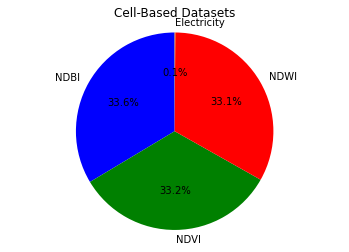

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV files
ndbi_data = pd.read_csv('cell_output_ndbi.csv')['Cell-Based Difference']
ndvi_data = pd.read_csv('cell_output_ndvi.csv')['Cell-Based Difference']
ndwi_data = pd.read_csv('cell_output_ndwi.csv')['Cell-Based Difference']
electricity_data = pd.read_csv('cell_output.csv')['Cell-Based Difference']

# Calculate the sum of absolute differences for each dataset
ndbi_sum = ndbi_data.abs().sum()
ndvi_sum = ndvi_data.abs().sum()
ndwi_sum = ndwi_data.abs().sum()
electricity_sum = electricity_data.abs().sum()

# Create a list of labels
labels = ['NDBI', 'NDVI', 'NDWI', 'Electricity']

# Create a list of values
values = [ndbi_sum, ndvi_sum, ndwi_sum, electricity_sum]

# Create a list of colors
colors = ['blue', 'green', 'red', 'orange']

# Create the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal
plt.axis('equal')

# Set the title
plt.title('Cell-Based Datasets')

# Show the plot
plt.show()


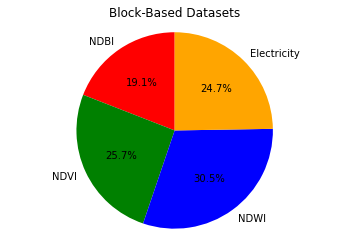

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV files
ndbi_data = pd.read_csv('block_output_ndbi.csv')['Block-Based Difference']
ndvi_data = pd.read_csv('block_output_ndvi.csv')['Block-Based Difference']
ndwi_data = pd.read_csv('block_output_ndwi.csv')['Block-Based Difference']
electricity_data = pd.read_csv('block_output.csv')['Block-Based Difference']




# Calculate the sum of absolute differences for each dataset
ndbi_sum = ndbi_data.abs().sum()
ndvi_sum = ndvi_data.abs().sum()
ndwi_sum = ndwi_data.abs().sum()
electricity_sum = electricity_data.abs().sum()

# Create a list of labels
labels = ['NDBI', 'NDVI', 'NDWI', 'Electricity']

# Create a list of values
values = [ndbi_sum, ndvi_sum, ndwi_sum, electricity_sum]

# Create a list of colors
colors = ['red', 'green', 'blue', 'orange']

# Create the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal
plt.axis('equal')

# Set the title
plt.title('Block-Based Datasets')

# Show the plot
plt.show()


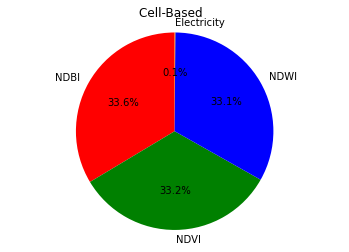

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data from the CSV files
ndbi_data = pd.read_csv('cell_output_ndbi.csv')['Cell-Based Difference']
ndvi_data = pd.read_csv('cell_output_ndvi.csv')['Cell-Based Difference']
ndwi_data = pd.read_csv('cell_output_ndwi.csv')['Cell-Based Difference']
electricity_data = pd.read_csv('cell_output.csv')['Cell-Based Difference']

# # Filter the datasets to keep only positive values
# ndbi_data = ndbi_data[ndbi_data > 0]
# ndvi_data = ndvi_data[ndvi_data >= 1]
# ndwi_data = ndwi_data[ndwi_data >= -111]
# electricity_data = electricity_data[electricity_data>=-11 ]

# Calculate the sum of absolute differences for each dataset
ndbi_sum = np.abs(ndbi_data).sum()
ndvi_sum = np.abs(ndvi_data).sum()
ndwi_sum = np.abs(ndwi_data).sum()
electricity_sum = np.abs(electricity_data).sum()

# Create a list of labels
labels = ['NDBI', 'NDVI', 'NDWI', 'Electricity']

# Create a list of values
values = [ndbi_sum, ndvi_sum, ndwi_sum, electricity_sum]

# Create a list of colors
colors = ['red', 'green', 'blue', 'orange']


# Create the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal
plt.axis('equal')

# Set the title
plt.title('Cell-Based  ')

# Show the plot
plt.show()


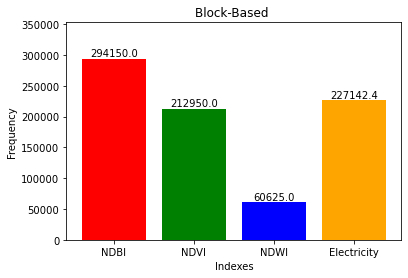

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data from the CSV files
ndbi_data = pd.read_csv('block_output_ndbi.csv')['Block-Based Difference']
ndvi_data = pd.read_csv('block_output_ndvi.csv')['Block-Based Difference']
ndwi_data = pd.read_csv('block_output_ndwi.csv')['Block-Based Difference']
electricity_data = pd.read_csv('block_output.csv')['Block-Based Difference']

ndwi_data = ndwi_data[ndwi_data > 22]
ndvi_data = ndvi_data[ndvi_data > 15]
electricity_data = electricity_data[electricity_data >= 22]



# Calculate the sum of absolute differences for each dataset
ndbi_sum = np.abs(ndbi_data).sum()
ndvi_sum = np.abs(ndvi_data).sum()
ndwi_sum = np.abs(ndwi_data).sum()
electricity_sum = np.abs(electricity_data).sum()

# Create a list of labels
labels = ['NDBI', 'NDVI', 'NDWI', 'Electricity']

# Create a list of values
values = [ndbi_sum, ndvi_sum, ndwi_sum, electricity_sum]

# Create a bar chart
plt.bar(labels, values, color=['red', 'green', 'blue', 'orange'])

# Set the y-axis range to make the Electricity bar more visible
plt.ylim(top=max(values) * 1.2)

# Add the value labels to the bars
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Indexes')
plt.ylabel('Frequency')
plt.title('Block-Based ')

# Show the plot
plt.show()


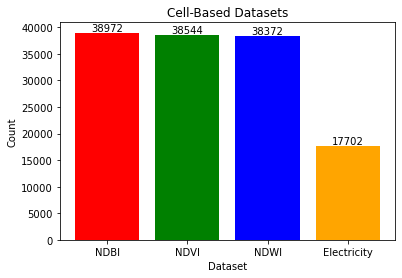

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data from the CSV files
ndbi_data = pd.read_csv('cell_output_ndbi.csv')['Cell-Based Difference']
ndvi_data = pd.read_csv('cell_output_ndvi.csv')['Cell-Based Difference']
ndwi_data = pd.read_csv('cell_output_ndwi.csv')['Cell-Based Difference']
electricity_data = pd.read_csv('cell_output.csv')['Cell-Based Difference']

# Filter the datasets to keep only positive values
ndbi_data = ndbi_data[ndbi_data > 0]
ndvi_data = ndvi_data[ndvi_data >= 1]
ndwi_data = ndwi_data[ndwi_data >= -111]
electricity_data = electricity_data[electricity_data >= -11]

# Calculate the sum of absolute differences for each dataset
ndbi_sum = np.abs(ndbi_data).sum()
ndvi_sum = np.abs(ndvi_data).sum()
ndwi_sum = np.abs(ndwi_data).sum()
electricity_count = len(electricity_data)

# Create a list of labels
labels = ['NDBI', 'NDVI', 'NDWI', 'Electricity']

# Create a list of values
values = [ndbi_sum, ndvi_sum, ndwi_sum, electricity_count]

# Create a list of colors
colors = ['red', 'green', 'blue', 'orange']

# Create the bar chart
plt.bar(labels, values, color=colors)

# Add value labels to the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Cell-Based Datasets')

# Show the plot
plt.show()


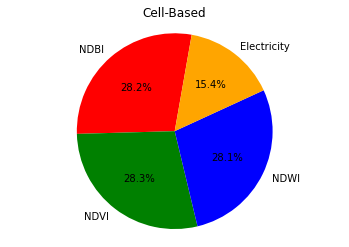

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data from the CSV files
ndbi_data = pd.read_csv('cell_output_ndbi.csv')['Cell-Based Difference']
ndvi_data = pd.read_csv('cell_output_ndvi.csv')['Cell-Based Difference']
ndwi_data = pd.read_csv('cell_output_ndwi.csv')['Cell-Based Difference']
electricity_data = pd.read_csv('cell_output.csv')['Cell-Based Difference']

# Filter the datasets to keep only positive values
ndbi_data = ndbi_data[ndbi_data > 0]
ndvi_data = ndvi_data[ndvi_data >= 1]
ndwi_data = ndwi_data[ndwi_data >=1]
electricity_data = electricity_data[electricity_data >= -11]

# Calculate the count of values for each dataset
ndbi_count = len(ndbi_data)
ndvi_count = len(ndvi_data)
ndwi_count = len(ndwi_data)
electricity_count = len(electricity_data)

# Create a list of labels
labels = ['NDBI', 'NDVI', 'NDWI', 'Electricity']

# Create a list of counts
counts = [ndbi_count, ndvi_count, ndwi_count, electricity_count]

# Create a list of colors
colors = ['red', 'green', 'blue', 'orange']

# Create the pie chart
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=80)

# Set the aspect ratio to be equal
plt.axis('equal')

# Set the title
plt.title('Cell-Based')

# Show the plot
plt.show()


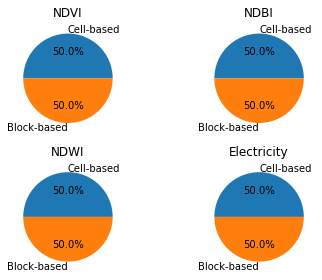

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV files
cell_ndvi_data = pd.read_csv('cell_output_ndvi.csv')['Cell-Based Difference']
block_ndvi_data = pd.read_csv('block_output_ndvi.csv')['Block-Based Difference']
cell_ndbi_data = pd.read_csv('cell_output_ndbi.csv')['Cell-Based Difference']
block_ndbi_data = pd.read_csv('block_output_ndbi.csv')['Block-Based Difference']
cell_ndwi_data = pd.read_csv('cell_output_ndwi.csv')['Cell-Based Difference']
block_ndwi_data = pd.read_csv('block_output_ndwi.csv')['Block-Based Difference']
cell_electricity_data = pd.read_csv('cell_output.csv')['Cell-Based Difference']
block_electricity_data = pd.read_csv('block_output.csv')['Block-Based Difference']

# Calculate the counts for each dataset
cell_ndvi_count = len(cell_ndvi_data)
block_ndvi_count = len(block_ndvi_data)
cell_ndbi_count = len(cell_ndbi_data)
block_ndbi_count = len(block_ndbi_data)
cell_ndwi_count = len(cell_ndwi_data)
block_ndwi_count = len(block_ndwi_data)
cell_electricity_count = len(cell_electricity_data)
block_electricity_count = len(block_electricity_data)

# Create a list of labels
labels = ['Cell-based', 'Block-based']

# Create a list of counts for NDVI
ndvi_counts = [cell_ndvi_count, block_ndvi_count]

# Create a pie chart for NDVI
plt.subplot(221)
plt.pie(ndvi_counts, labels=labels, autopct='%1.1f%%')
plt.title('NDVI')

# Create a list of counts for NDBI
ndbi_counts = [cell_ndbi_count, block_ndbi_count]

# Create a pie chart for NDBI
plt.subplot(222)
plt.pie(ndbi_counts, labels=labels, autopct='%1.1f%%')
plt.title('NDBI')

# Create a list of counts for NDWI
ndwi_counts = [cell_ndwi_count, block_ndwi_count]

# Create a pie chart for NDWI
plt.subplot(223)
plt.pie(ndwi_counts, labels=labels, autopct='%1.1f%%')
plt.title('NDWI')

# Create a list of counts for electricity
electricity_counts = [cell_electricity_count, block_electricity_count]

# Create a pie chart for electricity
plt.subplot(224)
plt.pie(electricity_counts, labels=labels, autopct='%1.1f%%')
plt.title('Electricity')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


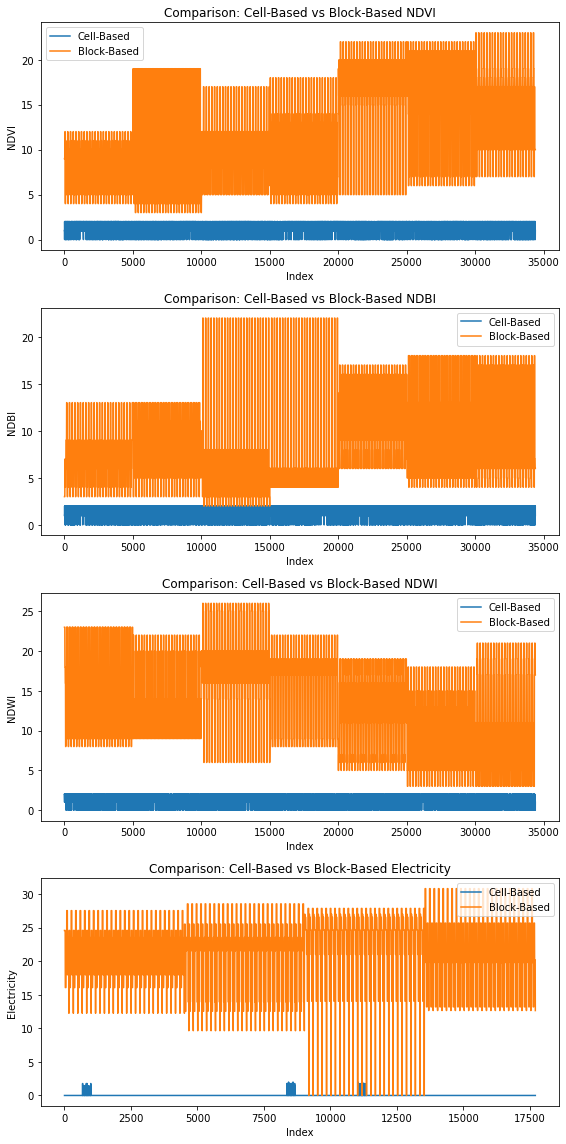

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV files
cell_ndvi_data = pd.read_csv('cell_output_ndvi.csv')['Cell-Based Difference']
block_ndvi_data = pd.read_csv('block_output_ndvi.csv')['Block-Based Difference']
cell_ndbi_data = pd.read_csv('cell_output_ndbi.csv')['Cell-Based Difference']
block_ndbi_data = pd.read_csv('block_output_ndbi.csv')['Block-Based Difference']
cell_ndwi_data = pd.read_csv('cell_output_ndwi.csv')['Cell-Based Difference']
block_ndwi_data = pd.read_csv('block_output_ndwi.csv')['Block-Based Difference']
cell_electricity_data = pd.read_csv('cell_output.csv')['Cell-Based Difference']
block_electricity_data = pd.read_csv('block_output.csv')['Block-Based Difference']

# Create a figure and axis for the plots
fig, axs = plt.subplots(4, 1, figsize=(8, 16))

# Plot the cell-based and block-based NDVI
axs[0].plot(cell_ndvi_data, label='Cell-Based')
axs[0].plot(block_ndvi_data, label='Block-Based')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('NDVI')
axs[0].set_title('Comparison: Cell-Based vs Block-Based NDVI')
axs[0].legend()

# Plot the cell-based and block-based NDBI
axs[1].plot(cell_ndbi_data, label='Cell-Based')
axs[1].plot(block_ndbi_data, label='Block-Based')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('NDBI')
axs[1].set_title('Comparison: Cell-Based vs Block-Based NDBI')
axs[1].legend()

# Plot the cell-based and block-based NDWI
axs[2].plot(cell_ndwi_data, label='Cell-Based')
axs[2].plot(block_ndwi_data, label='Block-Based')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('NDWI')
axs[2].set_title('Comparison: Cell-Based vs Block-Based NDWI')
axs[2].legend()

# Plot the cell-based and block-based electricity
axs[3].plot(cell_electricity_data, label='Cell-Based')
axs[3].plot(block_electricity_data, label='Block-Based')
axs[3].set_xlabel('Index')
axs[3].set_ylabel('Electricity')
axs[3].set_title('Comparison: Cell-Based vs Block-Based Electricity')
axs[3].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()
